In [ ]:
# I had to remove the collection-main folder in order to commit this assignment. in order to see if the code works,
# you need to download the collection and put it into the base folder

In [1]:
import pandas as pd

In [5]:
artworks_df = pd.read_csv("./collection-main/artworks.csv")
artists_df = pd.read_csv("./collection-main/artists.csv")

In [14]:
print(artworks_df.isnull().sum())

Title                     48
Artist                  1261
ConstituentID           1261
ArtistBio               6078
Nationality             1261
BeginDate               1261
EndDate                 1261
Gender                  1261
Date                    2016
Medium                  9254
Dimensions              8643
CreditLine              1523
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6786
Cataloged                  0
ObjectID                   0
URL                    56622
ImageURL               65964
OnView                155389
Circumference (cm)    156627
Depth (cm)            138821
Diameter (cm)         155168
Height (cm)            28748
Length (cm)           155926
Weight (kg)           156341
Width (cm)             29674
Seat Height (cm)      156637
Duration (sec.)       154684
dtype: int64


In [15]:
print(artists_df.isnull().sum())

ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2489
Gender            3245
BeginDate            0
EndDate              0
Wiki QID         12353
ULAN             12669
dtype: int64


In [9]:
print((artworks_df == '').sum())

Title                 0
Artist                0
ConstituentID         0
ArtistBio             0
Nationality           0
BeginDate             0
EndDate               0
Gender                0
Date                  0
Medium                0
Dimensions            0
CreditLine            0
AccessionNumber       0
Classification        0
Department            0
DateAcquired          0
Cataloged             0
ObjectID              0
URL                   0
ImageURL              0
OnView                0
Circumference (cm)    0
Depth (cm)            0
Diameter (cm)         0
Height (cm)           0
Length (cm)           0
Weight (kg)           0
Width (cm)            0
Seat Height (cm)      0
Duration (sec.)       0
dtype: int64
ConstituentID    0
DisplayName      0
ArtistBio        0
Nationality      0
Gender           0
BeginDate        0
EndDate          0
Wiki QID         0
ULAN             0
dtype: int64


In [13]:
print((artists_df == '').sum())

ConstituentID    0
DisplayName      0
ArtistBio        0
Nationality      0
Gender           0
BeginDate        0
EndDate          0
Wiki QID         0
ULAN             0
dtype: int64


In [11]:
print(artworks_df.dtypes)

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object


In [19]:
print(artists_df.dtypes)

ConstituentID             int64
DisplayName              object
ArtistBio                object
Nationality              object
Gender                   object
BeginDate        datetime64[ns]
EndDate          datetime64[ns]
Wiki QID                 object
ULAN                    float64
dtype: object


In [18]:
# dates converted to datetime format
artworks_df['BeginDate'] = pd.to_datetime(artworks_df['BeginDate'], errors='coerce')
artworks_df['EndDate'] = pd.to_datetime(artworks_df['EndDate'], errors='coerce')
artworks_df['DateAcquired'] = pd.to_datetime(artworks_df['DateAcquired'], errors='coerce')

artists_df['BeginDate'] = pd.to_datetime(artists_df['BeginDate'], errors='coerce')
artists_df['EndDate'] = pd.to_datetime(artists_df['EndDate'], errors='coerce')

/var/folders/bk/rwn0l3jd0m99vs6sy3_1c5jw0000gn/T/ipykernel_49412/2171669708.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  artworks_df['BeginDate'] = pd.to_datetime(artworks_df['BeginDate'], errors='coerce')
/var/folders/bk/rwn0l3jd0m99vs6sy3_1c5jw0000gn/T/ipykernel_49412/2171669708.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  artworks_df['EndDate'] = pd.to_datetime(artworks_df['EndDate'], errors='coerce')


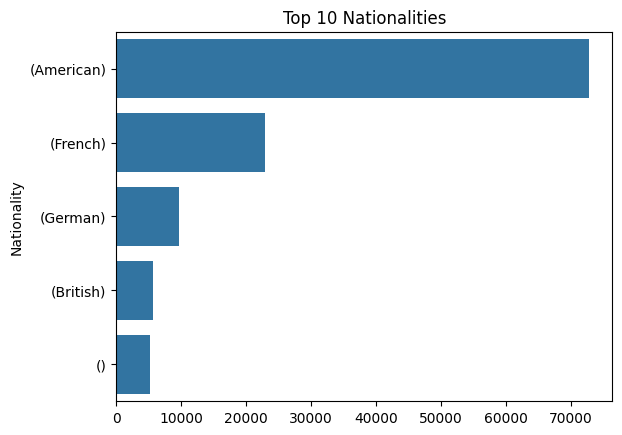

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

top_nationalities = artworks_df['Nationality'].value_counts().head(5)

sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title('Top 10 Nationalities')
plt.show()

In [32]:
artworks_df['ConstituentID'] = pd.to_numeric(artworks_df['ConstituentID'], errors='coerce')
merged_df = pd.merge(artworks_df, artists_df, on='ConstituentID', how='inner')
print(merged_df.head())

                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist  ConstituentID  \
0               Otto Wagner         6210.0   
1  Christian de Portzamparc         7470.0   
2                Emil Hoppe         7605.0   
3           Bernard Tschumi         7056.0   
4                Emil Hoppe         7605.0   

                                 ArtistBio_x Nationality_x BeginDate_x  \
0                      (Austrian, 1841–1918)    (Austrian)         NaT   
1                        (French, born 1944)      (French)         NaT   
2                      (Austrian, 1876–1957)    (Austrian)         NaT   
3  (French and Swiss, born Switzerland 1944)            ()         NaT   
4               

In [34]:
american_artworks = merged_df[merged_df['Nationality_x'].str.contains('American', na=False)]
print(american_artworks.head())

                                                Title           Artist  \
30  Memorial to the Six Million Jewish Martyrs, pr...    Louis I. Kahn   
64                         Earth-Cloud House, project  Raimund Abraham   
65  Pedestrian City project, Hypostyle Courtyard (...   Roger C. Ferri   
67  Pedestrian City project, Hypostyle Courtyard (...   Roger C. Ferri   
69  Pedestrian City project, Hypostyle Courtyard (...   Roger C. Ferri   

    ConstituentID                          ArtistBio_x Nationality_x  \
30         2964.0  (American, born Estonia. 1901–1974)    (American)   
64           47.0  (American, born Austria. 1933–2010)    (American)   
65         1863.0                (American, 1949–1991)    (American)   
67         1863.0                (American, 1949–1991)    (American)   
69         1863.0                (American, 1949–1991)    (American)   

   BeginDate_x EndDate_x Gender_x  Date  \
30         NaT       NaT   (male)  1968   
64         NaT       NaT   (male)  1

In [36]:
austrian_artworks = merged_df[merged_df['Nationality_x'].str.contains('Austrian', na=False)]
print(austrian_artworks.head())

                                                Title           Artist  \
0   Ferdinandsbrücke Project, Vienna, Austria (Ele...      Otto Wagner   
2   Villa project, outside Vienna, Austria (Elevat...       Emil Hoppe   
4   Villa project, outside Vienna, Austria (Exteri...       Emil Hoppe   
32  Royal Hunting Tent, project, Exterior perspective  Marcel Kammerer   
34  House in Krems, project, Krems, Austria, Eleva...   Otto Schönthal   

    ConstituentID            ArtistBio_x Nationality_x BeginDate_x EndDate_x  \
0          6210.0  (Austrian, 1841–1918)    (Austrian)         NaT       NaT   
2          7605.0  (Austrian, 1876–1957)    (Austrian)         NaT       NaT   
4          7605.0  (Austrian, 1876–1957)    (Austrian)         NaT       NaT   
32         7607.0  (Austrian, 1878–1969)    (Austrian)         NaT       NaT   
34         7608.0  (Austrian, 1878–1961)    (Austrian)         NaT       NaT   

   Gender_x  Date                                             Medium  ... 